## <font color=red>(Part A) Transportation problem</font>

From <I>Linear and Integer Optimization</I>, Gerard Sierksma & Yori Zwols, 3$^{ed}$, CRC Press, 2015 (Chapter 8.2.1, page 345).

A truck rental company has three depots, labeled 1, 2, 3, at which a total of 8, 5, and 6 vehicles, respectively, are parked. Furthermore, there are five customers, labeled 1, ..., 5, demanding 2, 3, 5, 2, and 7 vehicles, respectively. The transportation costs (per vehicle) from the depots to the customers are listed in table (a) below. The problem is to transport the vehicles from the depots to the customers, making sure that the demand of the customers is satisfied, and in such a way that the total transportation costs are minimized. The figure (b) illustrates the situation by means of a graph.


### Formulating the mathematical model:
For $i$ = 1, 2, 3 and $j$ = 1, 2, 3, 4, 5, let $c_{ij}$ be the transportation cost from depot $i$ to customer $j$, and let <font color = red>$x_{ij}$ be the number of vehicles that are to be transported from depot $i$ to customer $j$;</font> the cost of transporting $x_{ij}$ vehicles from $i$ to $j$ is therefore $c_{ij}x_{ij}$. Moreover, let $a_i$ be the number of vehicles in depot $i$ (the supply). Hence, $a_1$ = 8, $a_2$ = 5, $a_3$ = 6. Let $b_j$ be the number of vehicles ordered by customer $j$ (the demand). Hence, $b_1$ = 2, $b_2$ = 3, $b_3$ = 5, $b_4$ = 2, $b_5$ = 7. Note that the problem is <B><font color = red>balanced</font></B> and can formulated as an ILO-model as follows:

min z = $4x_{11} +3x_{12} +8x_{13} +7x_{14} +9x_{15} $<BR>
&emsp; &emsp; $+6x_{21} +5x_{22} +6x_{23}+ 4x_{24} +5x_{25} $<BR>
&emsp; &emsp; $+7x_{31} +4x_{32} +7x_{33} +5x_{34} +4x_{35}$ <BR>
s.t. $ x_{11} +x_{12} +x_{13} +x_{14} +x_{15} = 8$<BR>
&emsp; $x_{21} +x_{22} +x_{23} +x_{24} +x_{25} = 5 $<BR>
&emsp; $x_{31} +x_{32} +x_{33} +x_{34} +x_{35} = 6$<BR>
&emsp; $x_{11}+x_{21}+x_{31} = 2$<BR>
&emsp; $x_{12}+x_{22}+x_{32} = 3$<BR>
&emsp; $x_{13}+x_{23}+x_{33} = 5$<BR>
&emsp; $x_{14}+x_{24}+x_{34} = 2$<BR>
&emsp; $x_{15}+x_{25}+x_{35} = 7$<BR> 
&emsp; $x_{11}, ..., x_{35} ≥ 0$, and integer.

### Implementation in Python:

In [1]:
! pip install gurobipy


In [2]:
from gurobipy import *

def TransportationModel(supply, demand, cost):

    depots    = range(len(supply))         # Indices for the depots
    customers = range(len(demand))         # Indices for the customers

    if sum(supply) < sum(demand):
        print("Not balanced: supply (", sum(supply), ") < demand (", sum(demand), ")")
        return Model()                                                             # Unbalanced problems are not solved
    elif sum(supply) > sum(demand):
        print("Not balanced: supply (", sum(supply), ") > demand (", sum(demand), ")")
        return Model()                                                             # Unbalanced problems are not solved

    m = Model("Transportation")
    x = m.addVars(depots, customers, name = "Flow")          # no need to define as INTEGERs (see week 3)

    m.setObjective( quicksum(cost[i,j]*x[i,j] for i in depots for j in customers), GRB.MINIMIZE)
    m.addConstrs( (x.sum(i, "*") == supply[i] for i in depots), 'Supply')
    m.addConstrs( (x.sum("*", j) == demand[j] for j in customers), 'Demand')
    m.update()

    return m

### Use the model to solve the problem instance from the textbook:

In [3]:
import numpy as np

m = 3                                                                            # A small problem instance
n = 5
a = [8, 5, 6]                                                                    # Parameter a: supply
b = [2, 3, 5, 2, 7]                                                              # Parameter b: demand
c = np.array([ [4, 3, 8, 7, 9], [6, 5, 6, 4, 5], [7, 4, 7, 5, 4] ])              # Parameter c: unit cost matrix

TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.optimize()

status = TP.Status
if status != GRB.OPTIMAL:
    print(f"Optimization was stopped with status {status}")
else:
    print(f"The optimal objective is {TP.ObjVal:g}")
    print("\nVarName           |   value      c_ij    red.cost")
    for var in TP.getVars():
        if var.x > 0.5:
            print(f"{var.VarName:17} |{var.X:8.3f}  {var.obj:8.2f}   {var.rc:8.2f}")
    print("\nConstrName        |     RHS     Slack         Pi")
    for cons in TP.getConstrs():
        print(f"{cons.ConstrName:17} |{cons.rhs:8.2f}  {cons.Slack:8.2f}   {cons.pi:8.2f}")

Restricted license - for non-production use only - expires 2025-11-24
Model has 15 variables, 8 constraints and 30 nonzeros

The optimal objective is 90

VarName           |   value      c_ij    red.cost
Flow[0,0]         |   2.000      4.00       0.00
Flow[0,1]         |   3.000      3.00       0.00
Flow[0,2]         |   3.000      8.00       0.00
Flow[1,2]         |   2.000      6.00       0.00
Flow[1,3]         |   2.000      4.00       0.00
Flow[1,4]         |   1.000      5.00       0.00
Flow[2,4]         |   6.000      4.00       0.00

ConstrName        |     RHS     Slack         Pi
Supply[0]         |    8.00      0.00       2.00
Supply[1]         |    5.00      0.00       0.00
Supply[2]         |    6.00      0.00      -1.00
Demand[0]         |    2.00      0.00       2.00
Demand[1]         |    3.00      0.00       1.00
Demand[2]         |    5.00      0.00       6.00
Demand[3]         |    2.00      0.00       4.00
Demand[4]         |    7.00      0.00       5.00


### Problem W2.0

As follow-up questions on the problem solved above: write a few line of code that produce:
   - the objective value of the dual (z_dual) and compares the value with the objective value of the primal
   - use the duals to calculate the reduced cost for the basic variables. (Are they all equal to 0?)
   - use the duals to calculate the reduced cost for the non-basic variables. (Are they all < 0?)

In [4]:
import numpy as np
from itertools import product

# Extract the primal solution x
x = np.array([var.x for var in TP.getVars()]).reshape(m,n)
print(x)


[[2. 3. 3. 0. 0.]
 [0. 0. 2. 2. 1.]
 [0. 0. 0. 0. 6.]]


In [5]:
import numpy as np
from itertools import product

# Extract the primal solution x
x = np.array([var.x for var in TP.getVars()]).reshape(m,n)
print(x)
# Extract the dual solution u and v
u, v = np.array([cons.pi for cons in TP.getConstrs()][0:m]), np.array([cons.pi for cons in TP.getConstrs()][m:m+n])
#u is dual solution for supply
#v is dual solution for demand
print(u,v)

z_dual = sum(u[i]*a[i] for i in range(m)) + sum(v[j]*b[j] for j in range(n))
print(f"Primal Objective Value: {TP.ObjVal:g}, Dual Objective Value: {z_dual:g}")
#dual solution = primal solution

[[2. 3. 3. 0. 0.]
 [0. 0. 2. 2. 1.]
 [0. 0. 0. 0. 6.]]
[ 2.  0. -1.] [2. 1. 6. 4. 5.]
Primal Objective Value: 90, Dual Objective Value: 90


In [6]:
# Task 2 & 3: Calculate reduced costs and categorize as basic or non-basic
basic_vars_reduced_cost = []
non_basic_vars_reduced_cost = []

for i, j in product(range(m), range(n)):
    reduced_cost = c[i, j] - u[i] - v[j]
    if x[i, j] > 0:  # Basic variable
        basic_vars_reduced_cost.append(reduced_cost)
    else:  # Non-basic variable
        non_basic_vars_reduced_cost.append(-reduced_cost) #for intervention, diff between lecture & gurobi

print("Reduced costs for basic variables (should be 0):", basic_vars_reduced_cost)
print("Are all reduced costs for basic variables 0?", all(np.isclose(rc, 0) for rc in basic_vars_reduced_cost))

print("Reduced costs for non-basic variables (should be < 0):", non_basic_vars_reduced_cost)
print("Are all reduced costs for non-basic variables < 0?", all(rc < 0 for rc in non_basic_vars_reduced_cost))

Reduced costs for basic variables (should be 0): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Are all reduced costs for basic variables 0? True
Reduced costs for non-basic variables (should be < 0): [-1.0, -2.0, -4.0, -4.0, -6.0, -4.0, -2.0, -2.0]
Are all reduced costs for non-basic variables < 0? True


## <font color=red>(Part B) Use the model with all kinds of data</font>

As in real life, most transportation problems are not balanced, can formulate to similar models: one for problems with total supply > total demand and one for problems with total supply < total demand. Alternatively, we can just simply adjust the data in case we encounter an unbalanced problem. That is, add either a dummy supply node or a dummy demand node.
- (A) to study the balanced version of the Transportation Problem,
- (B) use it for an unbalanced problem with data being read from an Excel file,
- (C) and use it for a coaching problem similar to the Linear Assignment Problem. More concrete, four swimmers need to be selected for the three 4x100m Medley teams (Womens, Mens and Mixed team). See if you select the gold winning team from the last European Championship.

### Problem W2.1
In the cell below, data is read from an Excel-file "Transportation.xlsx" for an unbalanced Transportation Problem. Running the cell, you will notice that it will not yield a solution. Modify the code below (not the TransportationModel() function) in order to get an equivalent balanced problem instance and present the solution for the original problem instance.

In [7]:
import pandas as pd
import numpy as np

m = 5
n = 5
c = pd.read_excel("Transportation.xlsx", sheet_name = 'Example', header = None, skiprows = 1, nrows = m, usecols = 'B:F').values.tolist()
a = pd.read_excel("Transportation.xlsx", sheet_name = 'Example', header = None, skiprows = 1, nrows = m, usecols = 'G').values.flatten().tolist()
b = pd.read_excel("Transportation.xlsx", sheet_name = 'Example', header = None, skiprows = m+1, nrows = 1, usecols = 'B:F').values.tolist()[0]

### Adjust the parameters in order to have a balanced problem that can be solved with TransportationModel()


# Adjust the parameters for a balanced problem
total_supply = sum(a)
total_demand = sum(b)

if total_supply > total_demand:
    # Add a dummy demand node
    n += 1  # Increase the number of customers
    b.append(total_supply - total_demand)  # Set the demand of the dummy node
    for row in c:
        row.append(0)  # Add zero cost to dummy node
elif total_supply < total_demand:
    # Add a dummy supply node
    m += 1  # Increase the number of depots
    a.append(total_demand - total_supply)  # Set the supply of the dummy node
    c.append([0] * n)  # Add zero cost from dummy depot
c = np.array(c)
# Print the adjusted cost matrix, supply, and demand
print("Adjusted Cost matrix:")
print(c)
print("Adjusted Supply:", a)
print("Adjusted Demand:", b)

# Solve the adjusted problem
TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.optimize()

# Display the solution
for var in TP.getVars():
    if abs(var.x) > 1e-6:  # only printing non-zeros
        print('{0} = {1:6.2f}'.format(var.VarName[:18], var.x))

Adjusted Cost matrix:
[[ 13  10  22  29  18   0]
 [ 14  13  16  21 999   0]
 [  3   0 999  11   6   0]
 [ 18   9  19  23  11   0]
 [ 30  24  34  36  28   0]]
Adjusted Supply: [5, 6, 7, 4, 3]
Adjusted Demand: [3, 5, 4, 5, 6, 2]
Model has 30 variables, 11 constraints and 60 nonzeros

Flow[0,0] =   3.00
Flow[0,1] =   2.00
Flow[1,2] =   4.00
Flow[1,3] =   2.00
Flow[2,1] =   3.00
Flow[2,3] =   3.00
Flow[2,4] =   1.00
Flow[3,4] =   4.00
Flow[4,4] =   1.00
Flow[4,5] =   2.00


## <font color=red>(Part C) Team selection for the 4x100m Medley </font>

### Problem W2.2
In the same Excel file "Transportation.xlsx", the Personal Records of Dutch swimmers who took part in the European Championships of 2022 are provided. Your task is to form teams for the 4x100m relay (Women, Men and Mixed) based on their PR's, i.e. four individuals are selected such that the total PR-time is minimal.

In the cell below, the Women's team is already determined. Adjust the code in order to find the Men's team and the Mixed team. The latter should consist of two male and two female swimmers (check if you have found the winning team).

Note: the problems could be solved by hand rather easily, but that would not be very interesting. Besides that, in reality also reserve-swimmers can be selected for the qualifying heats and the schedule of the championship should be taken in consideration in order to avoid overloading certain swimmers.

In [8]:
import pandas as pd
from datetime import datetime

m = 13                # Number of Women in TeamNL
n = 5                 # The 5-th event is being a supporter
times = pd.read_excel("Transportation.xlsx", sheet_name = 'Medley', header = None, skiprows = 4, nrows = m, usecols = 'B:E').to_numpy()

I = range(m)
J = range(4)

a = [1 for i in range(m)]
b = [1 for i in range(n)]
b[n-1] = m - n + 1
c = [[ (60*times[i][j].minute + times[i][j].second + times[i][j].microsecond/1e6) for j in range(n-1)] for i in range(m)]
[c[i].append(0) for i in range(m)]
c = np.array(c)

print("PB's on the four events")
print(c)
print("Supply:", a, "  Demand", b)

TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.optimize()

for j in J:
    for i in I:
        xij = TP.getVarByName(f"Flow[{i},{j}]")
        if xij.x == 1:
            print("Swimmer {:2}   on event {}   PR = {}".format(i+1, j+1, c[i,j]))

# for var in TP.getVars():
#    if abs(var.x) > 1e-6: # only printing non-zeros
#        print('{0} = {1:6.2f}'.format(var.VarName[:18], var.x))

PB's on the four events
[[63.91 74.86 54.6  69.96  0.  ]
 [58.65 90.89 54.48 64.26  0.  ]
 [59.62 81.14 55.99 58.1   0.  ]
 [65.56 89.02 54.57 58.71  0.  ]
 [63.25 72.05 53.24 59.3   0.  ]
 [79.77 66.92 68.3  74.43  0.  ]
 [75.37 69.75 54.05 59.12  0.  ]
 [69.76 69.19 58.29 62.64  0.  ]
 [70.44 83.23 55.47 64.38  0.  ]
 [64.7  76.5  55.69 62.21  0.  ]
 [68.24 83.03 55.35 64.75  0.  ]
 [65.94 89.48 55.83 65.19  0.  ]
 [61.35 74.5  58.33 60.44  0.  ]]
Supply: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   Demand [1, 1, 1, 1, 9]
Model has 65 variables, 18 constraints and 130 nonzeros

Swimmer  2   on event 1   PR = 58.65
Swimmer  6   on event 2   PR = 66.92
Swimmer  5   on event 3   PR = 53.24
Swimmer  3   on event 4   PR = 58.1


In [9]:
#Solve for men:

m = 10                # Number of Men in TeamNL
n = 5                 # The 5-th event is being a supporter
times = pd.read_excel("Transportation.xlsx", sheet_name = 'Medley', header = None, skiprows = 20, nrows = m, usecols = 'B:E').to_numpy()

I = range(m)
J = range(4)

a = [1 for i in range(m)]
b = [1 for i in range(n)]
b[n-1] = m - n + 1
c = [[ (60*times[i][j].minute + times[i][j].second + times[i][j].microsecond/1e6) for j in range(n-1)] for i in range(m)]
[c[i].append(0) for i in range(m)]
c = np.array(c)

print("PB's on the four events")
print(c)
print("Supply:", a, "  Demand", b)

TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.optimize()

for j in J:
    for i in I:
        xij = TP.getVarByName(f"Flow[{i},{j}]")
        if xij.x == 1:
            print("Swimmer {:2}   on event {}   PR = {}".format(i+1, j+1, c[i,j]))

# for var in TP.getVars():
#    if abs(var.x) > 1e-6: # only printing non-zeros
#        print('{0} = {1:6.2f}'.format(var.VarName[:18], var.x))

PB's on the four events
[[ 70.45  57.8   53.74  54.74   0.  ]
 [ 68.65  83.2   49.42  55.02   0.  ]
 [ 56.95  87.53  48.99  55.71   0.  ]
 [ 58.16  63.4   48.53  60.46   0.  ]
 [ 65.92  66.33  50.48  53.16   0.  ]
 [ 55.48  74.3   48.86  51.41   0.  ]
 [ 56.88 115.    49.67  61.39   0.  ]
 [ 59.44 102.84  49.68  55.25   0.  ]
 [ 64.67  70.7   49.78  53.68   0.  ]
 [ 59.66  66.92  53.93  55.27   0.  ]]
Supply: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   Demand [1, 1, 1, 1, 6]
Model has 50 variables, 15 constraints and 100 nonzeros

Swimmer  7   on event 1   PR = 56.88
Swimmer  1   on event 2   PR = 57.8
Swimmer  4   on event 3   PR = 48.53
Swimmer  6   on event 4   PR = 51.41


In [10]:
# Load data for women and men
m_women = 13   # Number of Women
m_men = 10     # Number of Men
n = 5          # The 5-th event is being a supporter

times_women = pd.read_excel("Transportation.xlsx", sheet_name='Medley', header=None, skiprows=4, nrows=m_women, usecols='B:E').to_numpy()
times_men = pd.read_excel("Transportation.xlsx", sheet_name='Medley', header=None, skiprows=20, nrows=m_men, usecols='B:E').to_numpy()

# Combine data
times_combined = np.vstack((times_women, times_men))
m_combined = m_women + m_men

I = range(m_combined)
J = range(4)

# Convert times to seconds and append zeros for supporters
c = [[(60*times_combined[i][j].minute + times_combined[i][j].second + times_combined[i][j].microsecond/1e6) for j in range(n-1)] for i in range(m_combined)]
[c[i].append(0) for i in range(m_combined)]
c = np.array(c)

# Create the model
model = Model()

# Variables: x[i, j] = 1 if swimmer i is selected for event j
x = model.addVars(m_combined, n, vtype=GRB.BINARY)

# Objective: Minimize total PR time
model.setObjective(sum(x[i, j] * c[i, j] for i in I for j in J), GRB.MINIMIZE)

# Constraints
# Each event has exactly one swimmer
for j in J:
    model.addConstr(sum(x[i, j] for i in I) == 1)

# Each swimmer is selected for at most one event
for i in I:
    model.addConstr(sum(x[i, j] for j in J) <= 1)

# Modify the constraints for gender balance
# Exactly two females (first 13 swimmers) across all events
model.addConstr(sum(x[i, j] for i in range(m_women) for j in J) == 2, "FemaleSwimmers")

# Exactly two males (next 10 swimmers) across all events
model.addConstr(sum(x[i, j] for i in range(m_women, m_combined) for j in J) == 2, "MaleSwimmers")

# Optimize the model
model.optimize()

# Print selected swimmers, their gender (Women/Men), and their PRs
for j in J:
    for i in I:
        if x[i, j].x > 0.5:  # If swimmer i is selected for event j
            gender = "Woman" if i < m_women else "Man"
            swimmer_no = i + 1 if gender == "Woman" else i + 1 - m_women
            print(f"{gender} Swimmer {swimmer_no} on event {j+1} PR = {c[i, j]}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 29 rows, 115 columns and 276 nonzeros
Model fingerprint: 0xea707024
Variable types: 0 continuous, 115 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 267.4600000
Presolve removed 0 rows and 23 columns
Presolve time: 0.01s
Presolved: 29 rows, 92 columns, 276 nonzeros
Variable types: 0 continuous, 92 integer (92 binary)
Found heuristic solution: objective 232.1400000

Root relaxation: objective 2.211000e+02, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf |

In [11]:
from tabulate import tabulate


def to_seconds(t):
    return 60*t.minute + t.second + t.microsecond/1e6


kwargs = {'io': 'Transportation.xlsx', 'sheet_name': 'Medley', 'index_col': 0, 'header': None, 'usecols': 'A:E'}
times = pd.concat([
    pd.read_excel(skiprows=4, nrows=13, **kwargs),
    pd.read_excel(skiprows=20, nrows=10, **kwargs)
]).applymap(to_seconds).assign(extra=0)

m = 23                # Number of Participants in TeamNL
n = 5                 # The 5-th event is being a supporter

I = range(m)
J = range(4)

a = [1 for i in range(m)]
b = [1 for i in range(n)]
b[n-1] = m - n + 1
c = times.values

print("PB's on the four events")
print(tabulate(times))
print("Supply:", a, "\nDemand:", b)

TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.addConstr(quicksum(TP.getVarByName(f"Flow[{i},{j}]") for i in range(13) for j in range(4)) == 2)
TP.optimize()

for j in J:
    for i in I:
        xij = TP.getVarByName(f"Flow[{i},{j}]")
        if xij.x == 1:
            print("Swimmer {:2}, {:20}   on event {},   PR = {}".format(i + 1, times.index[i], j+1, c[i,j]))


PB's on the four events
------------------  -----  ------  -----  -----  -
Valerie van Roon    63.91   74.86  54.6   69.96  0
Kira Toussaint      58.65   90.89  54.48  64.26  0
Maaike de Waard     59.62   81.14  55.99  58.1   0
Tessa Giele         65.56   89.02  54.57  58.71  0
Marrit Steenbergen  63.25   72.05  53.24  59.3   0
Tes Schouten        79.77   66.92  68.3   74.43  0
Kim Busch           75.37   69.75  54.05  59.12  0
Anne Palmans        69.76   69.19  58.29  62.64  0
Sam van Nunen       70.44   83.23  55.47  64.38  0
Silke Holkenberg    64.7    76.5   55.69  62.21  0
Imani de Jong       68.24   83.03  55.35  64.75  0
Janna van Kooten    65.94   89.48  55.83  65.19  0
Lotte Hosper        61.35   74.5   58.33  60.44  0
Arno Kamminga       70.45   57.8   53.74  54.74  0
Thom de Boer        68.65   83.2   49.42  55.02  0
Jesse Puts          56.95   87.53  48.99  55.71  0
Stan Pijnenburg     58.16   63.4   48.53  60.46  0
Thomas Verhoeven    65.92   66.33  50.48  53.16  0
Nyls Ko

## <font color=red>(Part D) Add your own models</font>

### Now, solve your models for problem W2.3 ... W2.5

# W2.3 - Model Formulation
### The Primal Model
\begin{aligned}
&\max\quad &z=2y_1+3y_2-3y_3+y_4\\
&s.t.\quad&2y_1-y_3+3y_4+y_5&\leq8\\
&&y_1+y_2-2y_3+y_4&=5\\
&&5y_2+4y_4-y_5&\geq10\\
&&y_1&\geq1\\
&&y_1\inℝ,\quad y_2,y_4,y_5\geq0,\quad y_3\leq0\\
\end{aligned}
**Part a**  
Before applying simplex step, we transform P into the standard equation form.  
Take $y_3'=-y_3$,  
\begin{aligned}
&\max\quad &z=2y_1+3y_2+3y'_3+y_4-Mu_1-Mu_2-Mu_3\\
&s.t.\quad&2y_1+y'_3+3y_4+y_5+y_6&=8\\
&&y_1+y_2+2y'_3+y_4+u_1&=5\\
&&5y_2+4y_4-y_5-y_7+u_2&=10\\
&&y_1-y_8+u_3&=1\\
&&y_1\inℝ,\quad y_2,y'_3,y_4,y_5,y_6,y_7,y_8,u_1,u_2,u_3\geq0\\
\end{aligned}
Next, rewrite the objective:  
\begin{aligned}
z=(2+6M)y_1+(3+6M)y_2+(3+2M)y'_3+(1+5M)y_4-My_5-My_7-My_8-16M
\end{aligned}
The simplex tableau,  

\begin{array}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
                                &           & y_1 & y_2 & y'_3 & y_4 & y_5 & y_6 & y_7 & y_8 & u_1 & u_2 & u_3 & \text{sol} &                            \\
\hline
c_{BI} & y_{BI} & 2+6M & 3+6M & 3+2M  & 1+5M & -M   & 0    & -M   & -M   & 0    & 0    & 0    & 16M & \text{Ratio}   \\
\hline
0         & u_1      & 0    & 2    & 1     & 3    & 1    & 1    & 0    & 0    & 0    & 0    & 0    & 8   &                            \\
0         & u_2      & 1    & 1    & 2     & 1    & 0    & 0    & 0    & 0    & 1    & 0    & 0    & 5   &                            \\
0         & u_3      & 0    & 5    & 0     & 4    & -1   & 0    & -1   & 0    & 0    & 1    & 0    & 10  &                            \\
0         & y_6      & 1    & 0    & 0     & 0    & 0    & 0    & 0    & -1   & 0    & 0    & 1    & 1   &                            \\
\hline
\end{array}
**Part b**  
We write $y_3$ in the form of $y_1$, $y_2$, $y_4$,  
\begin{aligned}
y_3=\frac{1}{2}(y_1+y_2+y_4-5)
\end{aligned}
\begin{aligned}
&\max\quad &z=0.5y_1+1.5y_2-0.5y_4+7.5\\
&s.t.&-0.5y_1+1.5y_2+2.5y_4+y_5\leq5.5\\
&&5y_2+4y_4-y_5\geq10\\
&&y_1\geq1\\
&&\frac{1}{2}(y_1+y_2+y_4-5)\leq0\\
&&y_1\in ℝ,y_2,y_4,y_5\geq0
\end{aligned}
The dual model
\begin{aligned}
&\min\quad&z_D=8x_1+5x_2+10x_3+x_4\\
&s.t.&x_2+x_4=2\\
&&2x_1+x_2+5x_3\geq3\\
&&-x_1-2x_2\leq-3\\
&&3x_1+x_2+4x_3\geq1\\
&&x_1-x_3\geq0\\
&&x_1\geq0,x_2\inℝ,x_3\leq0,x_4\leq0
\end{aligned}
We noticed that the last constraint is always true, hence we conclude that $y_5$ in the primal model is dominated by other variables.  


In [12]:
# Code for solving W2.3
# Without rewriting
from gurobipy import *

# Create a new model
model = Model("lp_model")

# Create variables
y1 = model.addVar(lb=1, vtype=GRB.CONTINUOUS, name="y1")
y2 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y2")
y3 = model.addVar(ub=0, vtype=GRB.CONTINUOUS, name="y3")
y4 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y4")
y5 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y5")

# Set objective function
model.setObjective(2*y1 + 3*y2 - 3*y3 + y4, GRB.MAXIMIZE)

# Add constraints
model.addConstr(2*y1 - y3 + 3*y4 + y5 <= 8, "c1")
model.addConstr(y1 + y2 - 2*y3 + y4 == 5, "c2")
model.addConstr(5*y2 + 4*y4 - y5 >= 10, "c3")

# Optimize the model
model.optimize()

# Print the results
print("Optimal solution:")
for v in model.getVars():
    print(f"{v.varName}: {v.x}")

print(f"Optimal objective value: {model.objVal}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 5 columns and 11 nonzeros
Model fingerprint: 0x3c4cddfe
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 1e+01]
Presolve removed 3 rows and 5 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.400000000e+01
Optimal solution:
y1: 1.0
y2: 4.0
y3: 0.0
y4: 0.0
y5: 0.0
Optimal objective value: 14.0


In [13]:
# Code for solving W2.3
# Rewriting y3
from gurobipy import *

# Create a new model
model = Model("lp_model")

# Create variables
y1 = model.addVar(lb=1, vtype=GRB.CONTINUOUS, name="y1")
y2 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y2")
y4 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y4")
y5 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y5")

# Set objective function
model.setObjective(0.5*y1+1.5*y2-0.5*y4+7.5, GRB.MAXIMIZE)

# Add constraints
model.addConstr(-0.5*y1 + 1.5*y2 + 2.5*y4 + y5 <= 5.5, "c1")
model.addConstr(5*y2 + 4*y4 - y5 >= 10, "c2")
model.addConstr(y1 >= 1, "c3")
model.addConstr(0.5*(y1 + y2 + y4 - 5) <= 0, "c4")

# Optimize the model
model.optimize()

# Print the results
print("Optimal solution:")
for v in model.getVars():
    print(f"{v.varName}: {v.x}")

print(f"Optimal objective value: {model.objVal}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 11 nonzeros
Model fingerprint: 0x9587e215
Coefficient statistics:
  Matrix range     [5e-01, 5e+00]
  Objective range  [5e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 3 rows, 3 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+01   0.000000e+00   0.000000e+00      0s
       0    1.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.400000000e+01
Optimal solution:
y1: 1.0
y2: 4.0
y4: 0.0
y5: 0.0
Optimal objective value: 14.0


## Conclusion:
The presolve analysis has revealed that it does not result in a different solution, and furthermore, it successfully reduces the number of decision variables without altering the optimal outcome.

# W2.4 - Model Formulation
## The Primal Model
### $\mathrm{I.}$ Decision Variables
Let $x_1$,$x_2$ and $x_3$ be the number of four-room houses, standard six-room houses, and luxurious six-bedroom houses to be built, respectively.
### $\mathrm{II.}$ Objective Function
\begin{aligned}
&\max\quad 60000x_1 + 100000x_2 + 120000x_3
\end{aligned}
### $\mathrm{III.}$  Constraints
\begin{aligned}
\begin{cases}
x_1+x_2+x_3\geq60\\
4x_1+6x_2+6x_3\geq270\\
160x_1+180x_2+240x_3\leq12900\\
120000x_1+200000x_2+240000x_3\leq12000000\\
x_1, x_2,x_3 \geq 0\\
\end{cases}
\end{aligned}
## The Dual Model
### $\mathrm{I.}$ Objective Function
\begin{aligned}
&\min\quad 60y_1+270y_2+12900y_3+12000000y_4
\end{aligned}
### $\mathrm{II.}$  Constraints
\begin{aligned}
\begin{cases}
y_1+4y_2+160y_3+120000y_4\geq60000\\
y_1+6y_2+180y_3+200000y_4\geq100000\\
y_1+6y_2+240y_3+240000y_4\geq120000\\
y_1,y_2\leq0, y_2,y_3 \geq 0\\
\end{cases}
\end{aligned}
## The Model with New Constraint
### $\mathrm{I.}$ Objective Function
\begin{aligned}
&\max\quad 60000x_1 + 100000x_2 + 120000x_3
\end{aligned}
### $\mathrm{II.}$  Constraints
\begin{aligned}
\begin{cases}
x_1+x_2+x_3\geq60\\
4x_1+6x_2+6x_3\geq270\\
160x_1+180x_2+240x_3\leq12900\\
120000x_1+200000x_2+240000x_3\leq12000000\\
0.5x_1+0.5x_2-0.5x_3\geq0\\
x_1, x_2,x_3 \geq 0\\
\end{cases}
\end{aligned}


In [14]:
! pip install gurobipy

In [15]:
# Code for solving W2.4
# Part c)
from gurobipy import Model, GRB, quicksum

def building():
    model = Model("building")
    model.Params.LogToConsole = 0

    CONSTANTS = {
        "number of houses": [1,1,1],
        "number of rooms": [4,6,6],
        "useful area": [160,180,240],
        "capital": [120000,200000,240000],
        "profit":[60000,100000,120000]
    }

    amounts = model.addVars(3, name=["4-room house","standard 6-room house","luxurious 6-room house"], lb=0,vtype=GRB.INTEGER)

    model.setObjective(quicksum(CONSTANTS['profit'][i] * amounts[i] for i in range(3)), GRB.MAXIMIZE)

    model.addConstr(quicksum(CONSTANTS['number of houses'][i] * amounts[i] for i in range(3)) >=60, "number of houses")
    model.addConstr(quicksum(CONSTANTS['number of rooms'][i] * amounts[i] for i in range(3)) >=270, "number of rooms")
    model.addConstr(quicksum(CONSTANTS['useful area'][i] * amounts[i] for i in range(3)) <=12900, "useful area")
    model.addConstr(quicksum(CONSTANTS['capital'][i] * amounts[i] for i in range(3)) <=12000000, "capital")

    model.optimize()

    print(f'Model: {model.NumVars} variables, {model.NumConstrs} constraints and {model.NumNZs} nonzeros')
    print(f"The optimal objective is {model.ObjVal*3:g} euro")
    amounts_optimized = {v.varName: v.x for v in model.getVars()}
    print(amounts_optimized)


building()


Model: 3 variables, 4 constraints and 12 nonzeros
The optimal objective is 1.8e+07 euro
{'4-room house': -0.0, 'standard 6-room house': 60.0, 'luxurious 6-room house': -0.0}


In [16]:
# Code for solving W2.4, with extra constraint
# Part d)

from gurobipy import Model, GRB, quicksum

def building():
    model = Model("building")
    model.Params.LogToConsole = 0

    CONSTANTS = {
        "number of houses": [1,1,1],
        "number of rooms": [4,6,6],
        "useful area": [160,180,240],
        "capital": [120000,200000,240000],
        "profit":[60000,100000,120000],
        "ratio":[0.5,0.5,-0.5]
    }

    amounts = model.addVars(3, name=["4-room house","standard 6-room house","luxurious 6-room house"], lb=0,vtype=GRB.INTEGER)

    model.setObjective(quicksum(CONSTANTS['profit'][i] * amounts[i] for i in range(3)), GRB.MAXIMIZE)

    model.addConstr(quicksum(CONSTANTS['number of houses'][i] * amounts[i] for i in range(3)) >=60, "number of houses")
    model.addConstr(quicksum(CONSTANTS['number of rooms'][i] * amounts[i] for i in range(3)) >=270, "number of rooms")
    model.addConstr(quicksum(CONSTANTS['useful area'][i] * amounts[i] for i in range(3)) <=12900, "useful area")
    model.addConstr(quicksum(CONSTANTS['capital'][i] * amounts[i] for i in range(3)) <=12000000, "capital")
    model.addConstr(quicksum(CONSTANTS['ratio'][i] * amounts[i] for i in range(3)) >=0, "ratio")

    model.optimize()

    print(f'Model: {model.NumVars} variables, {model.NumConstrs} constraints and {model.NumNZs} nonzeros')
    print(f"The optimal objective is {model.ObjVal*3:g} euros")
    amounts_optimized = {v.varName: v.x for v in model.getVars()}
    print(amounts_optimized)

    # Print for all constraints the most relevant attributes

building()


Model: 3 variables, 5 constraints and 15 nonzeros
The optimal objective is 1.8e+07 euros
{'4-room house': -0.0, 'standard 6-room house': 60.0, 'luxurious 6-room house': -0.0}


## Conclusion:
Upon reevaluation, it has been determined that, even without constraints, the optimal decision for Huibobe is to construct neither the "four-room house" nor the "luxurious six-bedroom house." The recommended choice is solely the construction of 60 the "standard six-room house"s. This conclusion remains consistent even when additional constraints are considered. The optimal objective in this scenario is to achieve a construction cost of 6,000,000 euros.

# W2.5 - Model Formulation

### $\mathrm{I.}$ Decision Variables
The decision variables are the start times for each node in the project. Let $t_i$ represent the start time for node $i$, where $i$ ranges from 1 to 9.

### $\mathrm{II.}$ Objective Function
Minimize the completion time of the project, represented by $t_9 - t_1$.

\begin{equation}
    \text{min} \quad t_9 - t_1
\end{equation}

### $\mathrm{III.}$ Constraints
The constraints ensure that each task is scheduled after its predecessors have been completed. The edges $(i, j)$ in the graph represent the activities/jobs from A to M that the project needs to finish. Therefore, for each edge, a constraint is added to ensure that $t_j - t_i \geq c_{i,j}$, where $c_{i,j}$ is the duration of the task.

\begin{equation}
    \text{s.t.} \quad t_j - t_i \geq c_{i,j} \text{ for } (i,\ j) \in \{1,\ ...,\ 9\}
\end{equation}

\begin{align*}
    &t_2 - t_1 \geq 2 \\
    &t_3 - t_1 \geq 3 \\
    &t_8 - t_2 \geq 4 \\
    &t_4 - t_3 \geq 2 \\
    &t_5 - t_3 \geq 3 \\
    &t_4 - t_5 \geq 4 \\
    &t_6 - t_5 \geq 6 \\
    &t_7 - t_5 \geq 4 \\
    &t_6 - t_4 \geq 3 \\
    &t_6 - t_8 \geq 4 \\
    &t_9 - t_8 \geq 6 \\
    &t_9 - t_7 \geq 2 \\
    &t_9 - t_6 \geq 1 \\
\end{align*}

### $\mathrm{IV.}$ Matrix Notation
The optimization problem can be represented in matrix notation as $Ax \geq b$:

\begin{equation}
    \begin{bmatrix}
    -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    -1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & -1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & -1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & -1 & 0 & 1 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & -1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
        t_1 \\ t_2 \\ t_3 \\ t_4 \\ t_5 \\ t_6 \\ t_7 \\ t_8 \\ t_9 \\
    \end{bmatrix}
    \geq
    \begin{bmatrix}
        2 \\ 3 \\ 4 \\ 2 \\ 3 \\ 4 \\ 6 \\ 4 \\ 3 \\ 4 \\ 6 \\ 2 \\ 1 \\
    \end{bmatrix}
\end{equation}




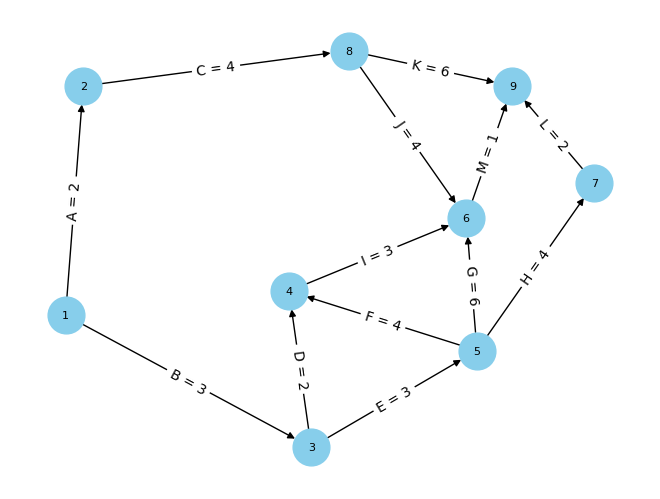

In [17]:
import networkx as nx
import matplotlib.pyplot as plt


nodes = range(1, 10)
edges = [
    (1, 2, {'label': 'A = 2'}),
    (1, 3, {'label': 'B = 3'}),
    (2, 8, {'label': 'C = 4'}),
    (3, 4, {'label': 'D = 2'}),
    (3, 5, {'label': 'E = 3'}),
    (5, 4, {'label': 'F = 4'}),
    (5, 6, {'label': 'G = 6'}),
    (5, 7, {'label': 'H = 4'}),
    (4, 6, {'label': 'I = 3'}),
    (8, 6, {'label': 'J = 4'}),
    (8, 9, {'label': 'K = 6'}),
    (7, 9, {'label': 'L = 2'}),
    (6, 9, {'label': 'M = 1'})
]

# Create a directed graph of the project
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
pos = nx.spectral_layout(G)
pos[4] += [-.5, .5]
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()



In [18]:
def  ProjectSchedulingProblem(duration, pred):
    # Create a new model
    model = Model("Minimal Production Time Model")
    model.Params.LogToConsole = 0

    # Create default constants
    NODES = range(1, 10)
    EDGES = 'ABCDEFGHIJKLM'
    DURATIONS = [2, 3, 4, 2, 3, 4, 6, 4, 3, 4, 6, 2, 1]
    START = [1, 1, 2, 3, 3, 5, 5, 5, 4, 8, 8, 7, 6]
    END = [2, 3, 8, 4, 5, 4, 6, 7, 6, 6, 9, 9, 9]

    # Create variables
    periods = model.addVars(NODES, name="Periods")

    # Set objective
    model.setObjective(periods[9] - periods[1], GRB.MINIMIZE)

    # Add constraints
    model.addConstrs((periods[END[i]] - periods[START[i]] >= DURATIONS[i] for i in range(len(DURATIONS))), "Times")

    # Optimize model
    model.optimize()

    # Print outcome of the optimization
    print(f"{model.ModelName}: {model.Status}")
    print(f"# {model.NumVars} variables, {model.NumConstrs} constraints and {model.NumNZs} nonzeros")
    print(f"Optimal objective: {model.ObjVal} weeks")
    print("Periods:", *[f" {i}th: {periods[i].X} weeks" for i in NODES], sep="\n")

    # Print for all variables the most relevant attributes
    print("\nVariables' attributes: ")
    print("VarName                  |     x_j      low   &   up |     c_j      low   &   up   type")
    for v in model.getVars():
        print(f"{v.VarName:24} |{v.X:8.2f} {v.lb:8.2f} {v.ub:8.2f} |{v.obj:8.2f} {v.saobjlow:8.2f} {v.saobjup:8.2f}      {v.vtype:3} ")

    # Print for all constraints the most relevant attributes
    print("\nConstraints' attributes: ")
    print("ConstrName               |     RHS     Slack         Pi")
    for i, c in enumerate(model.getConstrs()):
        print(f"{c.ConstrName:9}: {EDGES[i]:13} |{c.rhs:8.2f}  {c.Slack:8.2f}   {c.pi:8.2f}")

    return

pred = [0, 0, 1, 2, 2, 4, 4, 4, 3, 7, 7, 6, 5]
duration=[2, 3, 4, 2, 3, 4, 6, 4, 3, 4, 6, 2, 1]
ProjectSchedulingProblem(duration, pred)


Minimal Production Time Model: 2
# 9 variables, 13 constraints and 26 nonzeros
Optimal objective: 14.0 weeks
Periods:
 1th: 0.0 weeks
 2th: 2.0 weeks
 3th: 3.0 weeks
 4th: 10.0 weeks
 5th: 6.0 weeks
 6th: 13.0 weeks
 7th: 12.0 weeks
 8th: 6.0 weeks
 9th: 14.0 weeks

Variables' attributes: 
VarName                  |     x_j      low   &   up |     c_j      low   &   up   type
Periods[1]               |    0.00     0.00      inf |   -1.00    -1.00      inf      C   
Periods[2]               |    2.00     0.00      inf |    0.00     0.00      inf      C   
Periods[3]               |    3.00     0.00      inf |    0.00     0.00      inf      C   
Periods[4]               |   10.00     0.00      inf |    0.00     0.00      inf      C   
Periods[5]               |    6.00     0.00      inf |    0.00     0.00      inf      C   
Periods[6]               |   13.00     0.00      inf |    0.00     0.00      inf      C   
Periods[7]               |   12.00     0.00      inf |    0.00     0.00    

## Conclusion
After thorough analysis, it has been determined that the minimal total duration required to complete all activities is 14 weeks.